# Code Soft - project -II - Spam SMS 

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [28]:
df = pd.read_csv('Spam.csv', encoding='iso-8859-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [29]:
unwanted_columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']
df = df.drop(unwanted_columns, axis=1)
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


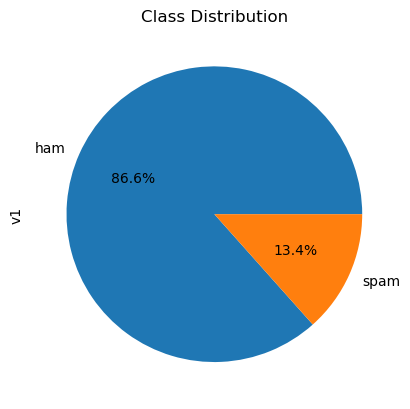

In [30]:
# Count the number of ham and spam messages
class_distribution = df['v1'].value_counts()

# Plot the class distribution
class_distribution.plot(kind='pie', autopct='%1.1f%%')
plt.title('Class Distribution')
plt.show()


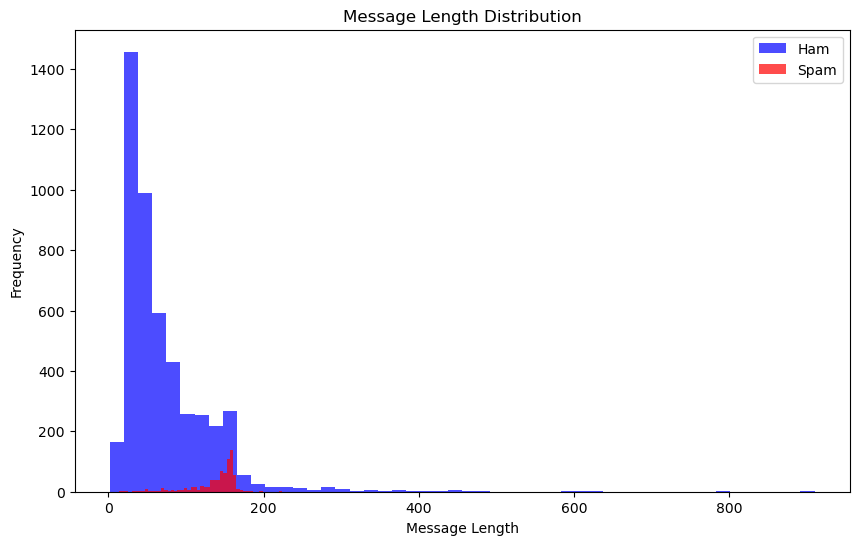

In [31]:
# Calculate message lengths for each SMS
df['message_length'] = df['v2'].apply(len)

# Plot histograms for message length distribution
plt.figure(figsize=(10, 6))
df[df['v1'] == 'ham']['message_length'].plot(bins=50, kind='hist', color='blue', label='Ham', alpha=0.7)
df[df['v1'] == 'spam']['message_length'].plot(bins=50, kind='hist', color='red', label='Spam', alpha=0.7)
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.legend()
plt.title('Message Length Distribution')
plt.show()


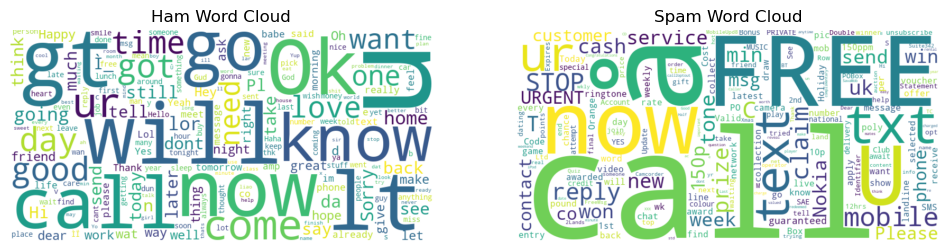

In [32]:
# Generate word cloud for ham messages
ham_text = ' '.join(df[df['v1'] == 'ham']['v2'])
ham_wordcloud = WordCloud(width=800, height=400, background_color='white', collocations=False).generate(ham_text)

# Generate word cloud for spam messages
spam_text = ' '.join(df[df['v1'] == 'spam']['v2'])
spam_wordcloud = WordCloud(width=800, height=400, background_color='white', collocations=False).generate(spam_text)

# Plot the word clouds
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.title('Ham Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('Spam Word Cloud')
plt.axis('off')

plt.show()


In [33]:
# Split the data into features (text) and labels (0 for ham, 1 for spam)
X = df['v2']
y = df['v1']

# Split the data into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Transform the text data into numerical features
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


In [34]:
# Initialize and train the Multinomial Naive Bayes classifier
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_tfidf, y_train)

MultinomialNB()

In [35]:
# Make predictions on the test set
y_pred = naive_bayes.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_rep)

Accuracy: 0.9623318385650225
Classification Report:
               precision    recall  f1-score   support

         ham       0.96      1.00      0.98       965
        spam       1.00      0.72      0.84       150

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115



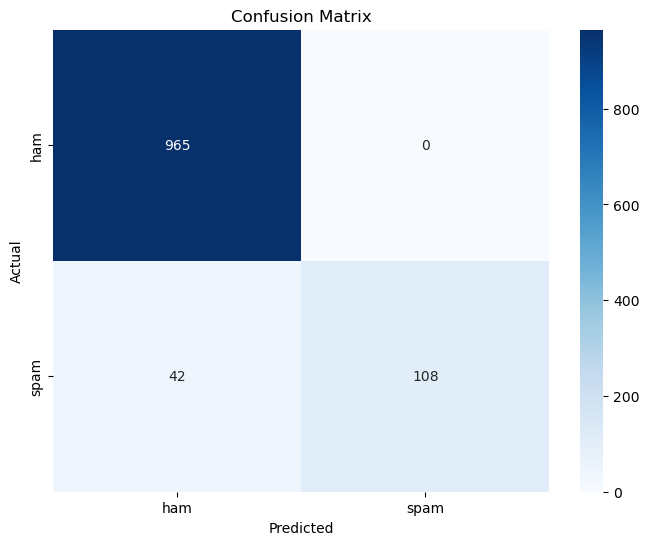

In [36]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [38]:
sample_message = input("Enter an SMS message: ")

# Preprocess and vectorize the sample message
sample_message_tfidf = tfidf_vectorizer.transform([sample_message])
prediction = naive_bayes.predict(sample_message_tfidf)
if prediction[0] == 'ham':
    print("The message is classified as HAM.")
else:
    print("The message is classified as SPAM.")


Enter an SMS message: free money claim upto 1500
The message is classified as SPAM.
